In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import os 

In [2]:
workdir = os.getcwd();
DataDir = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\DataSets'
Graph_Str = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\HW1_LinearRegHousing\HW1_Graphs'


In [3]:
df = pd.read_csv(DataDir + '/Housing.csv')

In [4]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  m = len(y)
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [5]:

def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)   
  """ 
  theta_history = np.zeros((iterations, len(theta)))
  X = pd.concat([pd.Series(1, index=X.index, name='x_0'), X], axis=1)
  m = len(y)
  cost_history = np.zeros(iterations) 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    theta_history[i, :] = theta 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history, theta_history

# Clensing of the Data 

In [6]:
print(df.dtypes)
df.head()

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
def catToUseful(df):
    newDf = df
    col = df.columns.tolist()
    types = df.dtypes
    for i in range(len(col)):

        if types[i] == 'object' or types[i] == 'str':
            newDf[col[i]] = df[col[i]].astype('category').cat.codes
        else: 
            newDf[col[i]] = df[col[i]]
    return newDf

In [8]:
# use standardScalar and normilization 
#  normal example preprocessing.Normalizer().fit(X)  
#  statdard example  preprocessing.StandardScaler().fit(X_train)
def standardize(df):
    # Standardization
    col = df.columns
    scale = preprocessing.StandardScaler().fit(df)
    df[col] = scale.transform(df[col]) 
    return df

def normalize(df):
    col = df.columns
    norm = preprocessing.Normalizer().fit(df)
    df[col] = norm.transform(df[col]) 
    return df 

In [9]:
def validation(X, Y, theta_history):
    val_history = np.zeros(len(theta_history))
    X = pd.concat([pd.Series(1, index=X.index, name='x_0'), X], axis=1)
    for i in range(len(val_history)):
        val_history[i] = compute_cost(X, Y, theta_history[i,:])   
    return val_history


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.735802,0.168664,0.226140,0.229104,0.222079,0.065360,-0.074979,-0.118360,-0.035331,0.237291,0.244554,0.290839,-0.226602
1,0.480943,0.211019,0.168552,0.649244,0.304099,0.048716,-0.055885,-0.088219,-0.026334,0.176863,0.321800,-0.066540,-0.168896
2,0.715271,0.396215,0.008445,0.253960,0.040084,0.072451,-0.083113,0.243169,-0.039164,-0.121292,0.271086,0.322394,-0.016372
3,0.646849,0.175862,0.227761,0.230746,0.036420,0.065829,-0.075516,0.220941,-0.035584,0.238992,0.434842,0.292924,-0.228226
4,0.654306,0.192654,0.258304,-0.104945,0.041303,0.074656,0.395546,0.250570,-0.040356,0.271040,0.279336,-0.101972,-0.258832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.433658,-0.272779,-0.359953,-0.156808,-0.255595,0.111551,-0.127967,0.374401,-0.060300,-0.186750,0.417384,-0.152366,0.336329
541,-0.433907,-0.342934,0.012780,-0.154134,-0.251236,-0.666436,-0.125785,-0.198562,-0.059272,-0.183565,-0.217809,-0.149768,-0.024778
542,-0.513378,-0.224492,-0.416236,-0.181327,-0.295561,0.128994,-0.147976,-0.233594,-0.069729,-0.215951,-0.256237,-0.176191,0.388919
543,-0.414857,-0.265565,0.012150,-0.146529,-0.238841,-0.633556,-0.119579,-0.188765,-0.056348,-0.174509,-0.207063,-0.142378,-0.361394


In [10]:
# gather data 
df = catToUseful(df)
print(df.head())
X_val = df.drop(columns = 'price')
Y_val = df['price']
df_p2 = normalize(standardize(df))
X_val2 = df_p2.drop(columns = 'price')
Y_val2 = df_p2['price']

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [11]:
# split data 
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_val, Y_val, test_size = .2, random_state = 69)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_val2, Y_val2, test_size = .2, random_state = 69)

In [12]:
Y_test1


285     4235000
160     5460000
454     3143000
78      6650000
192     5040000
         ...   
337     3920000
333     3920000
266     4403000
2      12250000
57      7245000
Name: price, Length: 109, dtype: int64

In [13]:
# 1 Develop gradient for these Columns: 
# area, bedrooms, bathrooms, stories, parking

# 2 Develop gradient for these columns: 
# Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [14]:
# Define Variables
col_p1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
col_p2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_train1_1 = X_train1[col_p1]
X_test1_1 = X_test1[col_p1]
X_train1_2 = X_train1[col_p2]
X_test1_2 = X_test1[col_p2] 
X_train2_1 = X_train2[col_p1]
X_test2_1 = X_test2[col_p1]
X_train2_2 = X_train2[col_p2]
X_test2_2 = X_test2[col_p2] 
master = {'Prob1' : [[X_train1_1, X_test1_1, Y_train1, Y_test1], [X_train1_2, X_test1_2, Y_train1, Y_test1]], 'Prob2' : [[X_train2_1, X_test2_1, Y_train2, Y_test2], [X_train2_2, X_test2_2,  Y_train2, Y_test2]]}
key = ['Prob1', 'Prob2']
alpha = .000000001 
iterations = 1500 

# Problems 1 & 2 

In [15]:

container = np.empty((4,3), dtype = object)
print(container.shape)
val_history = np.empty((2,2), dtype = object)
temp = 0
for i in range(len(key)): 
    parts = master[key[i]]
    for j in range(len(parts)): 
        part = parts[j]
        theta = np.array([0]*(len(part[j].columns)+1))
        container[j + temp,0], container[j + temp,1], container[j + temp,2] = gradient_descent(part[0], part[2], theta, alpha, iterations)
        val_history[i,j] = validation(part[1],part[3], container[j + temp,2] )
        # plot 
        # return theta, cost_history, theta_history
        os.chdir(Graph_Str)
        plt.plot(range(1, iterations + 1),container[j + temp,1], color='blue') 
        plt.plot(range(1, iterations + 1),val_history[i,j], color='red') 
        plt.rcParams["figure.figsize"] = (10,6) 
        plt.grid() 
        plt.xlabel('Number of iterations') 
        plt.ylabel('Cost (J)') 
        plt.title(key[i] + 'Convergence of gradient descent for entire model: Column set '+ str(j)  )
        plt.savefig(key[i] + '_Col' + str(j) + '_LossGraph.jpg') 
        plt.clf()
        os.chdir(workdir)
    temp += 2
    alpha = .01 

(4, 3)
0
6
[1.18178516e+13 1.11993206e+13 1.06182642e+13 ... 1.60879211e+12
 1.60879211e+12 1.60879210e+12]
1
12
[1.18178516e+13 1.11993206e+13 1.06182642e+13 ... 1.60879156e+12
 1.60879155e+12 1.60879155e+12]
2
6
[0.03200376 0.03194283 0.03188244 ... 0.01576596 0.01576478 0.0157636 ]
3
12
[0.0319757  0.03188687 0.03179876 ... 0.01161347 0.01161284 0.0116122 ]


<Figure size 432x288 with 0 Axes>

# Problem 3 

In [27]:
 
def gradient_descent_reg(X, y, theta, alpha, lamb_duh, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)   
  """ 
  theta_history = np.zeros((iterations, len(theta)))
  X = pd.concat([pd.Series(1, index=X.index, name='x_0'), X], axis=1)
  m = len(y)
  cost_history = np.zeros(iterations) 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    if(i != 0 ): 
        sum_delta += (lamb_duh/m)*theta
    theta = theta - sum_delta; 
    theta_history[i, :] = theta 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history, theta_history

In [25]:
lamb_duh = .01
alpha = .01
iterations = 1500

In [32]:
theta = np.array([0]*(len(X_train2_1.columns)+1))
theta1, cost_history1, theta_history1 = gradient_descent_reg(X_train2_1,Y_train2, theta, alpha, lamb_duh, iterations)
Val_hist1 = validation(X_test2_1, Y_test2, theta_history1)

theta = np.array([0]*(len(X_train2_2.columns)+1))
theta2, cost_history2, theta_history2 = gradient_descent_reg(X_train2_2,Y_train2, theta, alpha, lamb_duh, iterations)
Val_hist2 = validation(X_test2_2, Y_test2, theta_history2)

In [33]:
os.chdir(Graph_Str)
plt.plot(range(1, iterations + 1),cost_history1, color='blue') 
plt.plot(range(1, iterations + 1),Val_hist1, color='red') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title( 'Problem 3a Graph'   )
plt.savefig( 'Problem_3a_LossGraph.jpg') 
plt.clf()

os.chdir(Graph_Str)
plt.plot(range(1, iterations + 1),cost_history2, color='blue') 
plt.plot(range(1, iterations + 1),Val_hist2, color='red') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title( 'Problem 3b Graph'   )
plt.savefig( 'Problem_3b_LossGraph.jpg') 
plt.clf()
os.chdir(workdir)

<Figure size 720x432 with 0 Axes>

# Display Graphs 

In [37]:
from PIL import Image

In [46]:
os.chdir(Graph_Str)
graphs = os.listdir()


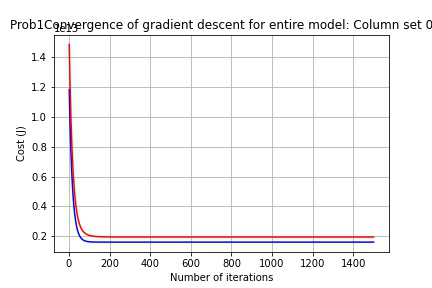

In [52]:
Image.open(graphs[0])

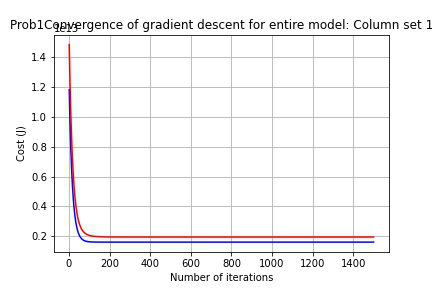

In [53]:
Image.open(graphs[1])

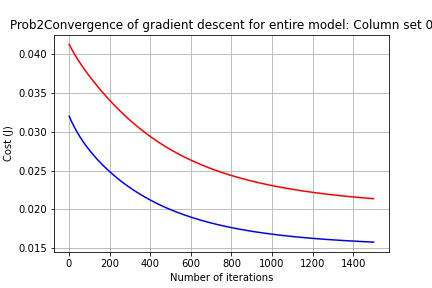

In [54]:
Image.open(graphs[2])

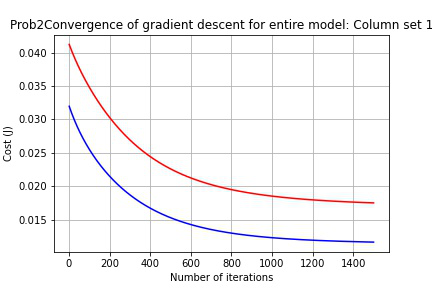

In [55]:
Image.open(graphs[3])

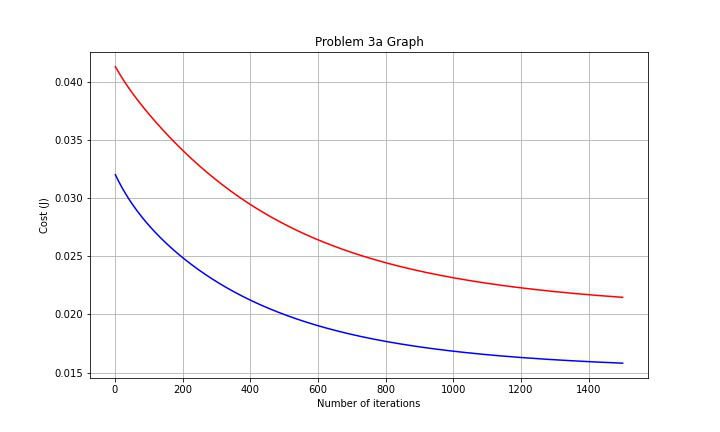

In [56]:
Image.open(graphs[4])

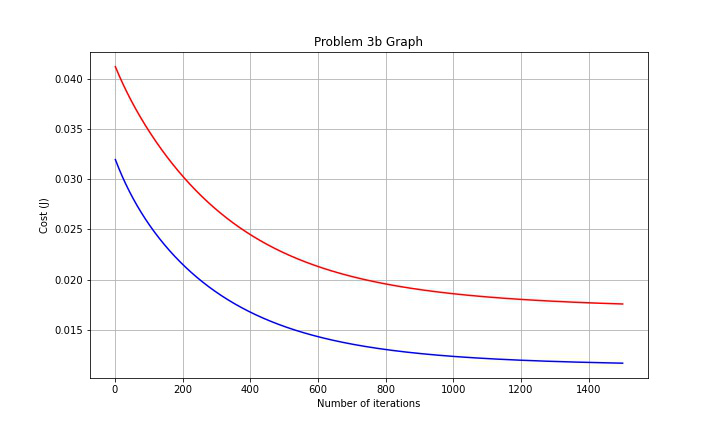

In [57]:
Image.open(graphs[5])